In [2]:
from model import Net, train, test
import pickle as pkl
import torch
from dataset import prepare_dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
model = Net(10)
trainloaders, valloaders, testloader = prepare_dataset(1, 32)

In [12]:
lr = 0.01
momentum = 0.9
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr, momentum)

In [13]:
train(model, trainloaders[0], optimizer, epochs, "cpu")

<All keys matched successfully>

(13.801573631353676, 0.9485)

In [23]:
y_test = []
predicted = []
for data, target in testloader:
	images, labels = data.to("cpu"), target.to("cpu").tolist()
	outputs = model(images)
	_, predict = torch.max(outputs.data, 1)
	predict = predict.tolist()
	y_test.extend(labels)
	predicted.extend(predict)

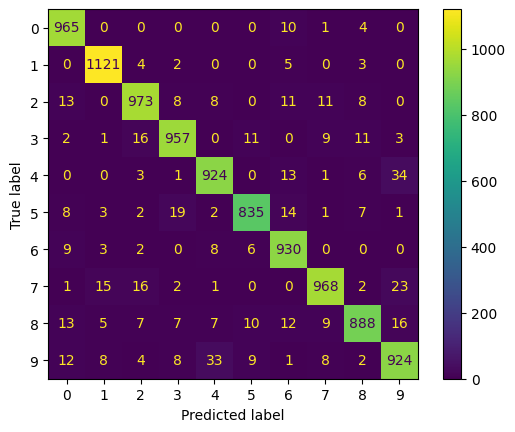

In [24]:
cm = confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(cm).plot(cmap='plasma')

In [73]:
msd = {
    "90n20r" : {
        "name":"90 Nodes for 20 rounds",
        "path": "./outputs/2024-02-01/12-40-14/",
        "final_model":"model20.pkl",
        "accuracy": 
        [(0, 0.0964), (1, 0.3231), (2, 0.5785), (3, 0.5866), 
         (4, 0.7365), (5, 0.7869), (6, 0.8375), (7, 0.8528), 
         (8, 0.874), (9, 0.8915), (10, 0.8997), (11, 0.9095), 
         (12, 0.9175), (13, 0.9225), (14, 0.9272), (15, 0.9336), 
         (16, 0.9368), (17, 0.9405), (18, 0.943), (19, 0.9457), 
         (20, 0.9485)],
         'color':'green',
         "type":'dashdot',
	},
	"90n10r" : {
		"name":"90 Nodes for 10 rounds",
		"path": "./outputs/2024-02-01/11-54-31/",
        "final_model":"model10.pkl",
        'accuracy': [(0, 0.0843), (1, 0.2623), (2, 0.4173), 
                     (3, 0.5308), (4, 0.6893), (5, 0.7781), 
                     (6, 0.8274), (7, 0.8653), (8, 0.8866), 
                     (9, 0.9022), (10, 0.9105)]
		,'color':'green',
         "type":'dashdot',
	},
	"10n10r" : {
		"name":"10 Nodes for 10 rounds",
		"path": "./outputs/2024-02-01/15-58-41/",
        "final_model":"model.pkl",
        'color':'blue',
         "type":'solid',
		'accuracy': [(0, 0.0982), (1, 0.2475), (2, 0.4788), 
               (3, 0.6434), (4, 0.7934), (5, 0.8), (6, 0.8566), 
               (7, 0.8868), (8, 0.903), (9, 0.9146), (10, 0.9246)]
	},
	"10n20r" : {
		"name":"10 Nodes for 20 rounds",
		"path": "./outputs/2024-02-01/15-50-53/",
        "final_model":"model.pkl",
        "accuracy": [(0, 0.0914), (1, 0.1405), (2, 0.1704), 
                     (3, 0.3967), (4, 0.5445), (5, 0.6491), 
                     (6, 0.7781), (7, 0.8392), (8, 0.8707), 
                     (9, 0.895), (10, 0.895), (11, 0.9198), 
                     (12, 0.9271), (13, 0.9192), (14, 0.9365), 
                     (15, 0.9397), (16, 0.9442), (17, 0.9492), 
                     (18, 0.9501), (19, 0.9525), (20, 0.9544)],
        'color':'blue',
         "type":'solid',
	},
}

In [74]:
from pathlib import Path

In [93]:
accuracy_dict={
    "CL for 10 epochs": 0.9891,
    "CL for 20 epochs": 0.9872,
}

In [109]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.style.use("seaborn-whitegrid")
color = ['lightblue', 'blue', 'purple', 'red', 'green', 'orange']

/var/folders/kx/5bcr7xtd3cx013wx021j2kc40000gn/T/ipykernel_50315/513015069.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


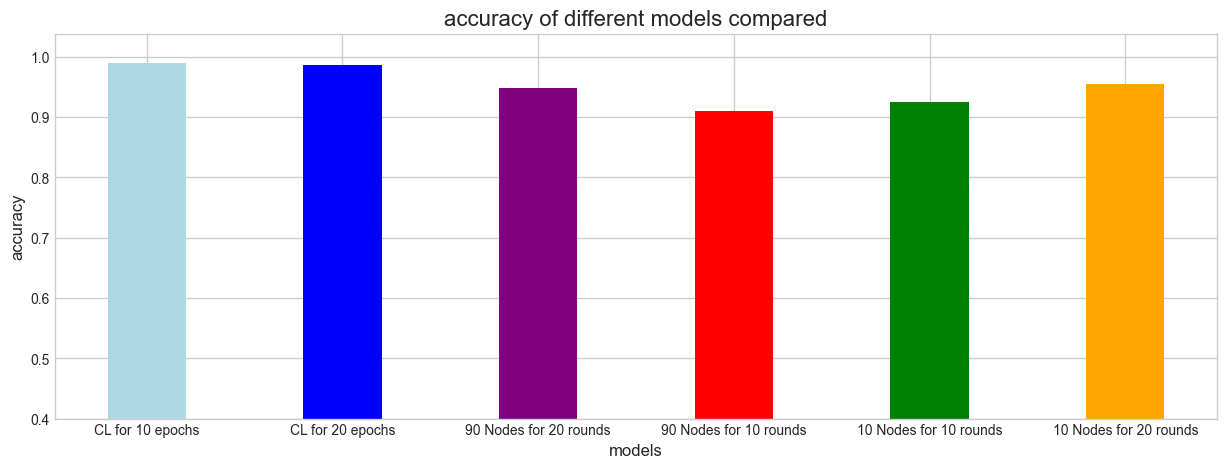

In [111]:
for key in msd:
	path = msd[key]['path']+msd[key]['final_model']
	model.load_state_dict(torch.load(path))
	loss, acc = test(model, testloader, "cpu")
	accuracy_dict[msd[key]['name']] = acc
	
	# if key.endswith("10r"):
	# 	acc= msd[key]['accuracy']
	# 	ac = [i[1] for i in acc]
	# 	rnd = [i[0] for i in acc]
	# 	plt.xticks(rnd)
	# 	plt.plot(ac,label=msd[key]['name'],color=msd[key]['color'],linestyle=msd[key]['type']) 
	
	plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color = color, width=0.4)
	
	
plt.xlabel('models', fontsize=12, weight = "bold")
plt.ylim(0.4)
plt.ylabel('accuracy',fontsize=12, weight = "bold")
# plt.title('accuracy of different models compared')
plt.legend()
plt.show()